# MNIST
### DAHAMOU ABDELILAH

In [2]:
import keras
import numpy as np
import math
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt

charger la base de données MNIST

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

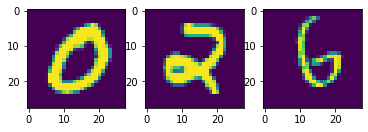

In [4]:
randindices=np.random.randint(x_train.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(x_train[randindices[0],:,:])
plt.subplot(1,3,2)
plt.imshow(x_train[randindices[1],:,:])
plt.subplot(1,3,3)
plt.imshow(x_train[randindices[2],:,:])

In [5]:
print(y_train[randindices[0]],y_train[randindices[1]],y_train[randindices[2]])

0 2 6


In [6]:
x_train[randindices[0],:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2,   7, 104, 170, 255, 209,  19,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         37, 165, 253, 253, 253, 253, 253, 159,   2,   0,   0,   0,   0,
          0,   0],
       [  

Aplatir les images et normalisation

In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


convertir les classes en vecteurs binaires (categorical)

In [8]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## entraînement d'un MLP

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-3),
              metrics=['accuracy'])

c:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
batch_size = 128
epochs = 20

In [12]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.3561 - accuracy: 0.8920 - val_loss: 0.1221 - val_accuracy: 0.9629
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1447 - accuracy: 0.9571 - val_loss: 0.0861 - val_accuracy: 0.9739
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1081 - accuracy: 0.9678 - val_loss: 0.0841 - val_accuracy: 0.9743
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0872 - accuracy: 0.9738 - val_loss: 0.0707 - val_accuracy: 0.9789
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0752 - accuracy: 0.9772 - val_loss: 0.0666 - val_accuracy: 0.9805
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0657 - accuracy: 0.9795 - val_loss: 0.0757 - val_accuracy: 0.9783
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0572 - accuracy: 0.9822 - val_loss: 0.0663 - val_accuracy: 0.9810
Epoch 

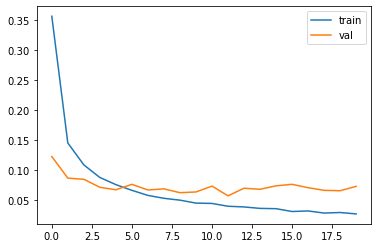

In [13]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

score sur toute la base de données de test

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0723402127623558
Test accuracy: 0.9833999872207642


regardons le résultat sur quelques images de test

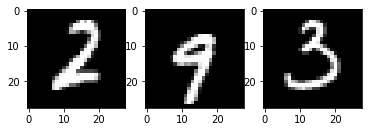

In [15]:
randindices=np.random.randint(x_test.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(np.reshape(x_test[randindices[0],:],(28,28)), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(np.reshape(x_test[randindices[1],:],(28,28)), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(np.reshape(x_test[randindices[2],:],(28,28)), cmap='gray')


In [16]:
predictions=model.predict(x_test)
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[0],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[0],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[1],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[1],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[2],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[2],:]) * 100) + '%.')

313/313 [==============================] - 1s 3ms/step
Le réseau reconnaît le chiffre 2 avec une confiance 99.99377727508545%.
Le réseau reconnaît le chiffre 9 avec une confiance 100.0%.
Le réseau reconnaît le chiffre 3 avec une confiance 99.99358654022217%.


## FIN